# Face completion

## Imports

In [ ]:
from image_utils import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces
import numpy as np
import matplotlib.pyplot as pl

## Loading data

In [237]:
data, labels = load_data()
data = data / 255

## Dataset visualization

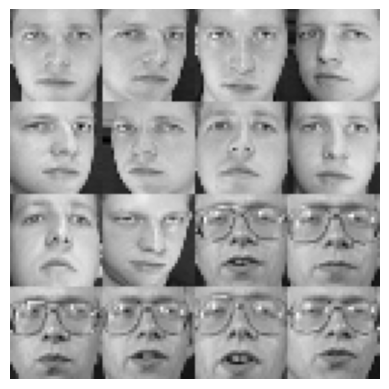

In [238]:
show_faces(data[:16], num_per_row = 4)

## Splitting into train and test sets

In [239]:
train_inds, test_inds = partition_data(labels, 4)
train_data, test_data = data[train_inds], data[test_inds]

## Splitting faces into two parts

In [240]:
train_left, train_right = split_left_right(train_data)
test_left, test_right = split_left_right(test_data)

## Concatenate

In [241]:
def add(vec) :
    vec = vec.reshape(512, 1)
    n = vec.shape[0]
    # ret = np.hstack([vec, np.ones((n, 1))])
    ret = np.concatenate((vec, np.ones((1, 1))))
    return ret

## Loss Function

In [242]:
def mse(y_pred, y_true):
    diff = y_pred - y_true
    return np.mean(diff ** 2)

## Training

In [243]:
train_left.shape, train_right.shape

((160, 512), (160, 512))

In [244]:
def train_pi(data) :
    n = data.shape[0]
    train_left_aug = np.hstack([data, np.ones((n, 1))])
    train_left_pinv = np.linalg.pinv(train_left_aug)
    return train_left_pinv @ train_right

In [245]:
def train_gd_mse(data) :
    k = data.shape[0]
    train_left_aug = np.hstack([data, np.ones((k, 1))])
    n, d = train_left_aug.shape
    m = train_right.shape[1]
    W = np.random.randn(d, m) * 0.001
    lr = 0.0001
    for i in range(3000):
        right_pred = train_left_aug @ W
        error = right_pred - train_right
        loss = mse(right_pred,train_right)
        grad = (2/n) * train_left_aug.T @ error
        W -= lr * grad
 #       if i % 500 == 0:
  #          print(i, loss)
    return W

In [246]:
def train_gd_lls(data) :
    k = data.shape[0]
    train_left_aug = np.hstack([data, np.ones((k, 1))])
    n, d = train_left_aug.shape
    m = train_right.shape[1]
    W = np.random.randn(d, m) * 0.001
    lr = 0.00001
    for i in range(3000):
        right_pred = train_left_aug @ W
        error = right_pred - train_right
        loss = np.sum(error**2)
        grad = 2 * train_left_aug.T @ error
        W -= lr * grad
    #    if i % 500 == 0:
     #       print(i, loss)
    return W

## Predicting right part

In [247]:
def predict(X, W):
    return X @ W

## Training loss

In [248]:
def training_loss(W) :
    pred = []
    for i in range(len(train_data)) :
        right_pred = predict(add(train_left[i]).flatten(), W)
        pred.append(right_pred)
    return mse(pred, train_right)

## Testing loss

In [249]:
def testing_loss(W) :
    pred = []
    for i in range(len(test_data)) :
        right_pred = predict(add(test_left[i]).flatten(), W)
        pred.append(right_pred)
    return mse(pred, test_right)

In [250]:
W1 = train_pi(train_left)
W2 = train_gd_mse(train_left)
W3 = train_gd_lls(train_left)
print("%.8f" % training_loss(W1))
print("%.8f" % testing_loss(W1))
print("%.8f" % training_loss(W2))
print("%.8f" % testing_loss(W2))
print("%.8f" % training_loss(W3))
print("%.8f" % testing_loss(W3))

0.00000000
0.01343770
0.01319879
0.01325669
0.00639402
0.00893260


## Concatenate image

In [251]:
def concat(image_left, image_right) :
    image = []
    for i in range(32) :
        for j in range(16) :
            image.append(image_left[i*16+j])
        for j in range(16) :
            image.append(image_right[i*16+j])
    return image

## Visualization

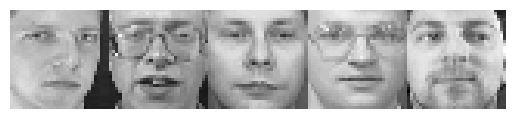

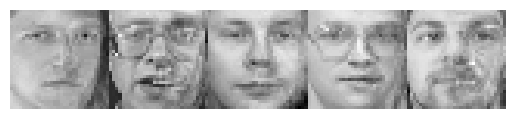

In [252]:
data1_list, data2_list = [], []
for i in range(0, 41, 10):
    data1_list.append(test_data[i])
    right_pred = predict(add(test_left[i]).flatten(), train_pi(train_left))
    data2_list.append(concat(test_left[i], right_pred))
data1 = np.array(data1_list)
data2 = np.array(data2_list)
show_faces(data1, num_per_row = 5)
show_faces(data2, num_per_row = 5)

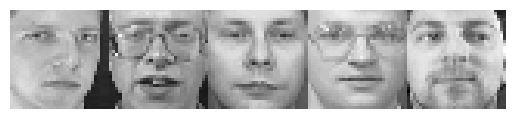

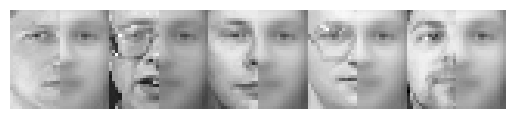

In [253]:
data1_list, data2_list = [], []
W = train_gd_mse(train_left)
for i in range(0, 41, 10):
    data1_list.append(test_data[i])
    right_pred = predict(add(test_left[i]).flatten(), W)
    data2_list.append(concat(test_left[i], right_pred))
data1 = np.array(data1_list)
data2 = np.array(data2_list)
show_faces(data1, num_per_row = 5)
show_faces(data2, num_per_row = 5)

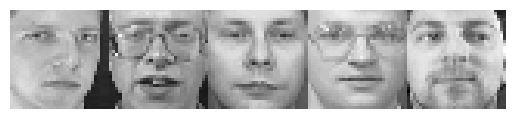

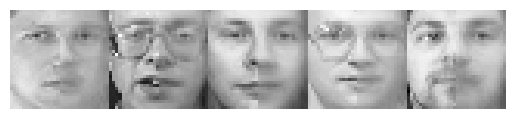

In [254]:
data1_list, data2_list = [], []
W = train_gd_lls(train_left)
for i in range(0, 41, 10):
    data1_list.append(test_data[i])
    right_pred = predict(add(test_left[i]).flatten(), W)
    data2_list.append(concat(test_left[i], right_pred))
data1 = np.array(data1_list)
data2 = np.array(data2_list)
show_faces(data1, num_per_row = 5)
show_faces(data2, num_per_row = 5)